<a href="https://colab.research.google.com/github/snehalad/email-classification-using-NLP/blob/main/email_classification_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Email Detection Model -> Spam or Not 📧 

Purpose of this notebook to classify email in two categories spam or not using NLP

About Dataset:
- We're using public dataset which includes two columns text (email) and spam (label)
- if text label is 1 it's spam otherwise 0.
- [Dataset Link](https://www.kaggle.com/bagavathypriya/email-spam-dataset)

NLP Flow
```
text -> turn it into number -> build a model -> train a model -> use patterns for making prediction
```



## Get Dataset And Visualize (Extract)

In [1]:
!wget https://raw.githubusercontent.com/snehalad/datasets/main/Email%20spam.csv

--2023-03-25 05:25:48--  https://raw.githubusercontent.com/snehalad/datasets/main/Email%20spam.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8960482 (8.5M) [text/plain]
Saving to: ‘Email spam.csv.1’

Email spam.csv.1    100%[===================>]   8.54M  --.-KB/s    in 0.1s    

2023-03-25 05:25:49 (78.1 MB/s) - ‘Email spam.csv.1’ saved [8960482/8960482]



In [2]:
import pandas as pd
df = pd.read_csv("/content/Email spam.csv")
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [3]:
len(df)

5728

In [4]:
df.spam.value_counts().head(32)

0    4360
1    1368
Name: spam, dtype: int64

<Axes: >

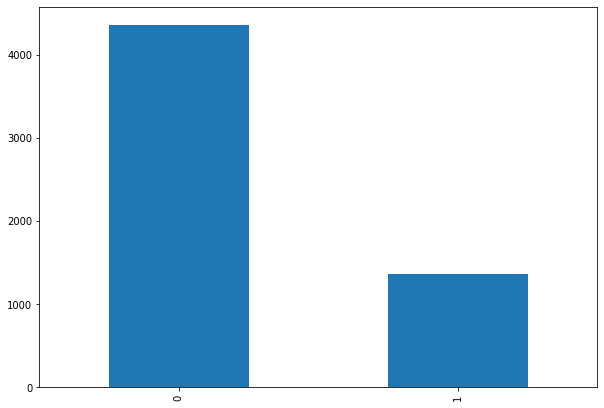

In [5]:
# plot value 0 & 1 value count
df['spam'].value_counts().plot(kind='bar', figsize=(10, 7))

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


## Preprocess Data (Transform)

In [7]:
# check out missing values
df.isnull().sum()

text    0
spam    0
dtype: int64

In [8]:
# duplicate data
df.duplicated().sum()

33

In [9]:
# drop duplicate values
df.drop_duplicates(inplace=True)

In [10]:
len(df) # previous len od dataset 5728

5695

In [11]:
df.text[:5]

0    Subject: naturally irresistible your corporate...
1    Subject: the stock trading gunslinger  fanny i...
2    Subject: unbelievable new homes made easy  im ...
3    Subject: 4 color printing special  request add...
4    Subject: do not have money , get software cds ...
Name: text, dtype: object

Now we will remove "Subject:" from text

In [12]:
# reset index
df.reset_index(inplace=True)

In [13]:
# what we want
df.loc[0, 'text'].split(' ', 1)[1]

"naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  marketing b

In [14]:
df.shape[0]

5695

In [15]:
for i in range(df.shape[0]):
 df.loc[i, 'text'] = df.loc[i, 'text'].split(' ', 1)[1]

In [16]:
# !jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10 

In [17]:
df.head()

,index,text,spam
0,0,naturally irresistible your corporate identity...,1
1,1,the stock trading gunslinger fanny is merrill...,1
2,2,unbelievable new homes made easy im wanting t...,1
3,3,4 color printing special request additional i...,1
4,4,"do not have money , get software cds from here...",1


Now we have clean data!!!

## Split data into train and test

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df['text'].to_numpy(),
                                                    df['spam'].to_numpy(),
                                                    test_size=0.1,
                                                    random_state=42)

In [20]:
# check shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((5125,), (570,), (5125,), (570,))

In [21]:
X_train[:2], y_train[:2]

(array(['re : eci id for stinson  steve -  could you please escalate per our conversation  thank you  paula  - - - - - - - - - - - - - - - - - - - - - - forwarded by paula corey / enron communications on  01 / 21 / 2000 08 : 35 am - - - - - - - - - - - - - - - - - - - - - - - - - - -  stinson gibner @ ect  01 / 21 / 2000 08 : 09 am  to : timothy morita - mcvey / enron communications @ enron communications @ enron  cc : paula corey / enron communications @ enron communications , jean mrha / enron  communications @ enron communications  subject : re : eci id for stinson  timothy :  i still have a problem . when i am on the eci network i cannot receive  email , and , even worse , i cannot even send email . this is not an  acceptable situation . i need to have a fully functional email account on  the eci side as well as the ena side . don \' t tell me that its against  policy because i know that ravi thuraisingham has already be set up this way  for months . i don \' t care if mail from on

## Converting text into Number

### Tokenization 
`layers.TextVectorization`

focus on
- max_tokens (max length of vocab)
- output_mode (dtype of output)
- output_sequence_length (how many words will see by model?)

In [22]:
X_train[:2]

array(['re : eci id for stinson  steve -  could you please escalate per our conversation  thank you  paula  - - - - - - - - - - - - - - - - - - - - - - forwarded by paula corey / enron communications on  01 / 21 / 2000 08 : 35 am - - - - - - - - - - - - - - - - - - - - - - - - - - -  stinson gibner @ ect  01 / 21 / 2000 08 : 09 am  to : timothy morita - mcvey / enron communications @ enron communications @ enron  cc : paula corey / enron communications @ enron communications , jean mrha / enron  communications @ enron communications  subject : re : eci id for stinson  timothy :  i still have a problem . when i am on the eci network i cannot receive  email , and , even worse , i cannot even send email . this is not an  acceptable situation . i need to have a fully functional email account on  the eci side as well as the ena side . don \' t tell me that its against  policy because i know that ravi thuraisingham has already be set up this way  for months . i don \' t care if mail from one

In [23]:
# to decide max_tokens
len(X_train[0].split(" "))

600

In [24]:
# find average no of tokens
round(sum([len(i.split()) for i in X_train])/ len(X_train))

327

In [25]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

In [26]:
# setup vectorization variable
max_vocab_lenght = 10000
max_length = 327

text_vectorizer = TextVectorization(max_tokens=max_vocab_lenght,
                                    output_mode='int',
                                    output_sequence_length=max_length)

In [27]:
# fit text vectorizer
text_vectorizer.adapt(X_train)

In [28]:
# let's test our text vectorizer
text_vectorizer([X_train[0]])

<tf.Tensor: shape=(1, 327), dtype=int64, numpy=
array([[  45, 6367,  476,   10,  170,  385,  129,    7,   37,    1,  310,
          43, 1473,  159,    7, 3415,  120,   31, 3415, 4696,   11,  152,
          13,  101,  320,   35,  148,  768,   36,  170,  291,   14,  101,
         320,   35,  148,  162,   36,    3, 3753,    1,    1,   11,  152,
          11,  152,   11,   46, 3415, 4696,   11,  152,   11,  152, 2163,
        3951,   11,  152,   11,  152,   40,   45, 6367,  476,   10,  170,
        3753,    9,  359,   23,    6,  466,  156,    9,   36,   13,    2,
        6367,  549,    9,  901,  322,   81,    4,  441, 8677,    9,  901,
         441,  161,   81,   15,   12,   39,   49, 2463, 1327,    9,   92,
           3,   23,    6, 1721, 5016,   81,  382,   13,    2, 6367, 1058,
          29,  167,   29,    2,  577, 1058,  275,  102,  914,   42,   16,
         173, 1266,  805,  338,    9,   62,   16,  673, 1161,   58,  440,
          17,  333,   84,   15,  249,   10,  497,    9,  275,  1

In [29]:
# get unique words from vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
print("Length of vocabulary:", len(words_in_vocab))
print("Most common words in vocab: ", words_in_vocab[:5])
print("Least Common words in vocab: ", words_in_vocab[-5:])

Length of vocabulary: 10000
Most common words in vocab:  ['', '[UNK]', 'the', 'to', 'and']
Least Common words in vocab:  ['econo', 'eclipse', 'ear', 'dyson', 'dynamically']


### Embedding
`layers.Embedding`

The parameters we care most about for our embedding layers:
- `input_dim` : Size of the vocabulary
- `output_dim` : Size of output embedding vector, for eg. a value of 100 would mean each token gets reprented by a vector 100 long
- `input_lenght` : Length of the sequences being passed to the embedding layer

In [30]:
from tensorflow.keras.layers import Embedding

In [31]:
embedding = Embedding(input_dim=max_vocab_lenght,
                      output_dim=128,
                      input_length=max_length)

In [32]:
# test embedding on random text
import random
random_text = random.choice(X_train)
text_embedding = embedding(text_vectorizer([random_text]))
text_embedding

<tf.Tensor: shape=(1, 327, 128), dtype=float32, numpy=
array([[[-0.03005164,  0.04770924,  0.02590152, ..., -0.01201184,
          0.00210582,  0.00180493],
        [-0.00838761, -0.01543368,  0.04173224, ...,  0.02217383,
          0.02284542, -0.04787673],
        [ 0.04698476,  0.03099606,  0.02447108, ..., -0.04160286,
          0.03933034, -0.02114377],
        ...,
        [-0.02509714,  0.01881899, -0.00349401, ..., -0.04255099,
         -0.01037329, -0.00783447],
        [-0.02509714,  0.01881899, -0.00349401, ..., -0.04255099,
         -0.01037329, -0.00783447],
        [-0.02509714,  0.01881899, -0.00349401, ..., -0.04255099,
         -0.01037329, -0.00783447]]], dtype=float32)>

In [33]:
# check out single token embedding
text_embedding[0][0], text_embedding[0][0].shape

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([-3.0051637e-02,  4.7709238e-02,  2.5901522e-02, -3.3922099e-02,
         4.6210993e-02,  4.5136038e-02,  3.7019502e-02,  1.0693453e-02,
         4.8716273e-02, -3.7619583e-03,  1.9894291e-02, -1.5994739e-02,
         2.4111997e-02, -1.3978075e-02, -4.2276468e-02,  3.7782677e-03,
         9.6298456e-03, -3.3815049e-02, -4.5039404e-02,  5.5592433e-03,
        -4.3193366e-02, -2.5043631e-02, -4.9005177e-02, -9.2481449e-04,
         1.0898195e-02,  2.9678915e-02, -3.8218498e-03, -3.6612809e-02,
         4.2089473e-02,  3.7058603e-02, -3.1133508e-02,  1.7489541e-02,
         4.0275421e-02,  4.7554795e-02, -1.6936827e-02,  4.8308264e-02,
         3.9833274e-02, -4.1149508e-02, -2.6945759e-02, -7.6373331e-03,
        -4.5565844e-02, -3.1988300e-02,  1.7927181e-02, -1.1086334e-02,
         3.1473193e-02,  2.8031468e-03,  2.4787076e-03,  1.3105083e-02,
         3.5075657e-03, -1.9650090e-02,  3.4990337e-02, -3.2358885e-02,
        -1.2297

## Creating Evaluation Function of our model experiments

In [34]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

In [98]:
def calculate_results(y_true, y_pred):
  # calculate model precision, recall and f1-score using "weighted" average
  model_precision, model_recall, model_f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_accuracy = accuracy_score(y_true, y_pred) 
  model_results = {"accuracy":model_accuracy,
                   "precision":model_precision,
                   "recall":model_recall,
                   "f1":model_f1_score}
  return model_results

## Running Series of Experiments

### Model 0 : Naive Bayes (Baseline)

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [100]:
# create tokenization and modeling pipeline
model_0 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

# fit a model
model_0.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [101]:
baseline_score = model_0.score(X_test, y_test)
print(f"Our baseline model achive a accuracy {baseline_score*100:.2f}")

Our baseline model achive a accuracy 85.79


In [102]:
baseline_preds = model_0.predict(X_test)
baseline_preds[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [103]:
y_test[:10]

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [104]:
baseline_result = calculate_results(y_test, baseline_preds)
baseline_result

{'accuracy': 0.8578947368421053,
 'precision': 0.8810547495499311,
 'recall': 0.8578947368421053,
 'f1': 0.8388448382827941}

### Model 1 : Simple Dense Layer

In [105]:
from tensorflow.keras import layers

In [106]:
from keras.api._v2.keras import activations
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs, name="Model_1_dense")

In [107]:
# model summary
model_1.summary()

Model: "Model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 327)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 327, 128)          1280000   
                                                                 
 global_average_pooling1d_4   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [108]:
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [109]:
model_1_history = model_1.fit(X_train,
                              y_train,
                              epochs=5,
                              validation_data=(X_test, y_test))

Epoch 1/5
161/161 [==============================] - 5s 26ms/step - loss: 0.3975 - accuracy: 0.8211 - val_loss: 0.3152 - val_accuracy: 0.8439
Epoch 2/5
161/161 [==============================] - 5s 29ms/step - loss: 0.2263 - accuracy: 0.9366 - val_loss: 0.2146 - val_accuracy: 0.9404
Epoch 3/5
161/161 [==============================] - 4s 25ms/step - loss: 0.1533 - accuracy: 0.9813 - val_loss: 0.1602 - val_accuracy: 0.9754
Epoch 4/5
161/161 [==============================] - 4s 24ms/step - loss: 0.1128 - accuracy: 0.9891 - val_loss: 0.1300 - val_accuracy: 0.9842
Epoch 5/5
161/161 [==============================] - 5s 29ms/step - loss: 0.0885 - accuracy: 0.9920 - val_loss: 0.1085 - val_accuracy: 0.9807


In [110]:
model_1.evaluate(X_test, y_test)

18/18 [==============================] - 0s 7ms/step - loss: 0.1085 - accuracy: 0.9807


[0.1085357666015625, 0.980701744556427]

In [111]:
model_1_preds_probs = model_1.predict(X_test)
model_1_preds_probs[:10]

18/18 [==============================] - 0s 7ms/step


array([[7.4959576e-02],
       [6.9763643e-01],
       [5.5669665e-05],
       [2.0466250e-01],
       [3.1004011e-04],
       [8.9552349e-01],
       [7.3447148e-07],
       [1.2183168e-06],
       [2.7783250e-04],
       [9.9867547e-04]], dtype=float32)

In [112]:
model_1_preds = tf.squeeze(tf.round(model_1_preds_probs))
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)>

In [113]:
model_1_results = calculate_results(y_test, model_1_preds)
model_1_results

{'accuracy': 0.980701754385965,
 'precision': 0.9806502616369591,
 'recall': 0.980701754385965,
 'f1': 0.9806415124883967}

## Recurrent Neural Network (RNN)

### Model 2 : LSTM 
(Long Short Term Memory Networks)

LSTMs are a type of Recurrent Neural Network (RNN) that can learn and memorize long-term dependencies.


In [114]:
# create model 2 with LSTM
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(64)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="Model_2_LSTM")

In [115]:
model_2.summary()

Model: "Model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 327)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 327, 128)          1280000   
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [116]:
# compile model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

After 2nd epochs accuracy stuck at 0.98 so we will fit model with 2epochs

In [117]:
# Fit a model
model_2_history = model_2.fit(X_train,
                              y_train,
                              epochs=2,
                              validation_data=(X_test, y_test)) 

Epoch 1/2
161/161 [==============================] - 53s 312ms/step - loss: 0.2742 - accuracy: 0.8802 - val_loss: 0.1063 - val_accuracy: 0.9719
Epoch 2/2
161/161 [==============================] - 48s 298ms/step - loss: 0.1086 - accuracy: 0.9612 - val_loss: 0.1577 - val_accuracy: 0.9491


In [118]:
# evaluate model
model_2.evaluate(X_test, y_test)

18/18 [==============================] - 1s 66ms/step - loss: 0.1577 - accuracy: 0.9491


[0.15773844718933105, 0.9491227865219116]

In [119]:
model_2_preds_prob = model_2.predict(X_test)
model_2_preds_prob[:10]

18/18 [==============================] - 3s 106ms/step


array([[6.6767068e-04],
       [7.5197810e-01],
       [6.5962749e-04],
       [7.5197816e-01],
       [9.4167929e-04],
       [7.5197810e-01],
       [6.7981728e-04],
       [6.6765485e-04],
       [6.6765898e-04],
       [6.6757842e-04]], dtype=float32)

In [120]:
model_2_preds = tf.squeeze(tf.round(model_2_preds_prob))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 0., 1., 0., 1., 0., 0., 0., 0.], dtype=float32)>

In [121]:
model_2_result = calculate_results(y_test, model_2_preds)
model_2_result

{'accuracy': 0.9491228070175438,
 'precision': 0.9563287488416676,
 'recall': 0.9491228070175438,
 'f1': 0.9503198619520898}

### model 3 : Bidirectional RNN

> Indented block



In [122]:
# create model 3 with bidirectional layer
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(32))(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_bidirectional")

In [123]:
model_3.summary()

Model: "model_3_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 327)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 327, 128)          1280000   
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,321,281
Trainable params: 1,3

In [124]:
# compile model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [125]:
model_3_history = model_3.fit(X_train,
                              y_train,
                              epochs=3,
                              validation_data=(X_test, y_test))

Epoch 1/3
161/161 [==============================] - 72s 416ms/step - loss: 0.0922 - accuracy: 0.9776 - val_loss: 0.0343 - val_accuracy: 0.9895
Epoch 2/3
161/161 [==============================] - 63s 391ms/step - loss: 0.0114 - accuracy: 0.9980 - val_loss: 0.0609 - val_accuracy: 0.9825
Epoch 3/3
161/161 [==============================] - 65s 402ms/step - loss: 0.0100 - accuracy: 0.9967 - val_loss: 0.0335 - val_accuracy: 0.9877


In [126]:
model_3_preds_prob = model_3.predict(X_test)
model_3_preds_prob[:10]

18/18 [==============================] - 2s 71ms/step


array([[2.0909234e-04],
       [9.6393782e-01],
       [3.1974301e-04],
       [1.5846051e-02],
       [3.8927811e-04],
       [9.9614334e-01],
       [2.9728992e-04],
       [1.7855370e-04],
       [2.0656011e-04],
       [2.6546005e-04]], dtype=float32)

In [127]:
model_3_preds = tf.squeeze(tf.round(model_3_preds_prob))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)>

In [128]:
model_3_results = calculate_results(y_test, model_3_preds)
model_3_results

{'accuracy': 0.987719298245614,
 'precision': 0.9877518904139478,
 'recall': 0.987719298245614,
 'f1': 0.9877317808207386}

🔑**Note** : We're getting accuracy early may be because our dataset is small

## Convolutional Neural Network (CNN)

### model 4 : Conv1D

In [129]:
# create model with conv1D
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=64,
                  kernel_size=5, 
                  activation="relu",
                  padding="valid")(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_Conv1D")

# compile model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [130]:
model_4.summary()

Model: "model_4_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 327)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 327, 128)          1280000   
                                                                 
 conv1d_4 (Conv1D)           (None, 323, 64)           41024     
                                                                 
 global_average_pooling1d_5   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_10 (Dense)            (None, 1)              

In [131]:
# Fit model
model_4_history = model_4.fit(X_train,
                              y_train,
                              epochs=3,
                              validation_data=(X_test, y_test))

Epoch 1/3
161/161 [==============================] - 18s 107ms/step - loss: 0.0645 - accuracy: 0.9912 - val_loss: 0.0480 - val_accuracy: 0.9842
Epoch 2/3
161/161 [==============================] - 19s 117ms/step - loss: 0.0138 - accuracy: 0.9986 - val_loss: 0.0460 - val_accuracy: 0.9877
Epoch 3/3
161/161 [==============================] - 17s 105ms/step - loss: 0.0084 - accuracy: 0.9990 - val_loss: 0.0481 - val_accuracy: 0.9877


In [132]:
# evaluate model
model_4.evaluate(X_test, y_test)

18/18 [==============================] - 0s 23ms/step - loss: 0.0481 - accuracy: 0.9877


[0.0480629988014698, 0.9877192974090576]

In [133]:
model_4_preds_probs = model_4.predict(X_test)
model_4_preds_probs[:10]

18/18 [==============================] - 1s 39ms/step


array([[1.75606419e-05],
       [9.96123016e-01],
       [4.12850418e-23],
       [3.47460620e-03],
       [1.25770833e-20],
       [9.99989271e-01],
       [1.08877666e-33],
       [1.53525219e-32],
       [1.74118055e-19],
       [1.10162035e-16]], dtype=float32)

In [134]:
model_4_preds = tf.squeeze(tf.round(model_4_preds_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)>

In [135]:
model_4_results = calculate_results(y_test, model_4_preds)
model_4_results

{'accuracy': 0.987719298245614,
 'precision': 0.987785441860322,
 'recall': 0.987719298245614,
 'f1': 0.9876546530336867}

## Comparing Results of Each model

In [144]:
all_model_results = pd.DataFrame({"Naive_Bayes":baseline_result,
                                  "Simple_Dense_layer":model_1_results,
                                  "LSTM":model_2_result,
                                  "Bidirectional":model_3_results,
                                  "Conv1D":model_4_results})
all_model_results = all_model_results.T
all_model_results

,accuracy,precision,recall,f1
Naive_Bayes,0.857895,0.881055,0.857895,0.838845
Simple_Dense_layer,0.980702,0.980650,0.980702,0.980642
LSTM,0.949123,0.956329,0.949123,0.950320
Bidirectional,0.987719,0.987752,0.987719,0.987732
Conv1D,0.987719,0.987785,0.987719,0.987655


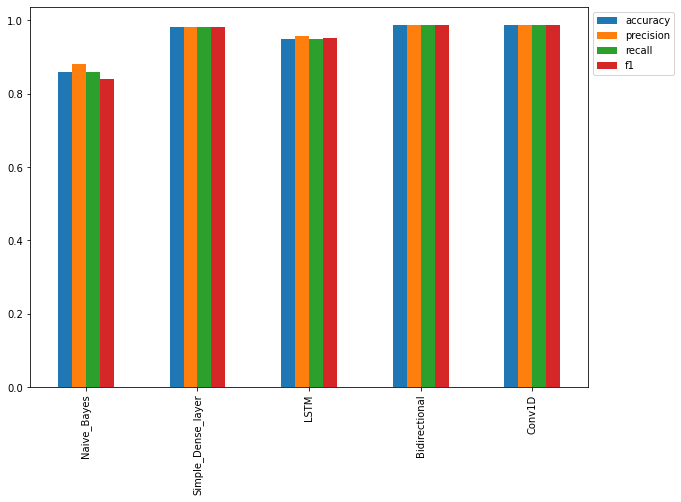

In [145]:
# plot all results and comapre them
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0))

<Axes: >

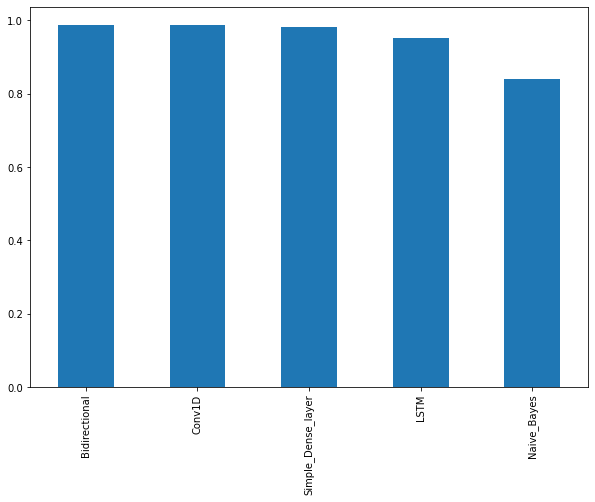

In [146]:
# sort model by f1 score
all_model_results.sort_values('f1', ascending=False)["f1"].plot(kind='bar', figsize=(10, 7))

⭐So Now we can conclude that model_2 (LSTM) and model_3 (Bidirectional) Model perform well.